<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [11]:
movies = pd.read_csv('/Users/nerajthangarajah/GA-WK-2/Homework/Unit2/data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [12]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [13]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [14]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [15]:
# Answer: .sort_values(ascending=False)
movies = movies.sort_values(by='duration',ascending=False)

In [16]:
movies.iloc[1]

star_rating                                                     8.2
title                                            Gone with the Wind
content_rating                                                    G
genre                                                         Drama
duration                                                        238
actors_list       [u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...
Name: 157, dtype: object

In [17]:
movies.iloc[-1]

star_rating                                                       8
title                                                        Freaks
content_rating                                              UNRATED
genre                                                         Drama
duration                                                         64
actors_list       [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...
Name: 389, dtype: object

#### Create a histogram of duration, choosing an "appropriate" number of bins.

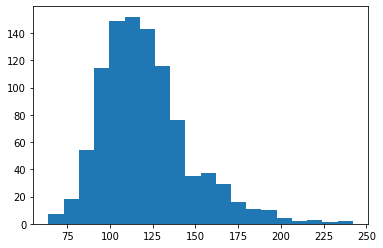

In [18]:
# Answer:
n_bins = 20
plt.hist(movies['duration'], bins=n_bins);

#### Use a box plot to display that same data.

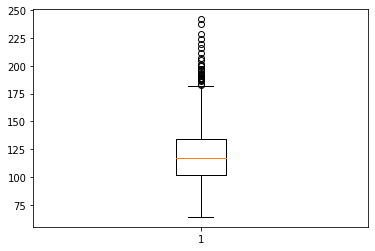

In [19]:
# Answer:
plt.boxplot(movies['duration']);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [20]:
# Answer:
# movies.groupby(['content_rating']).count()
ratings = movies.groupby(movies['content_rating'])[['title']].count()

In [21]:
ratings

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


#### Use a visualization to display that same data, including a title and x and y labels.

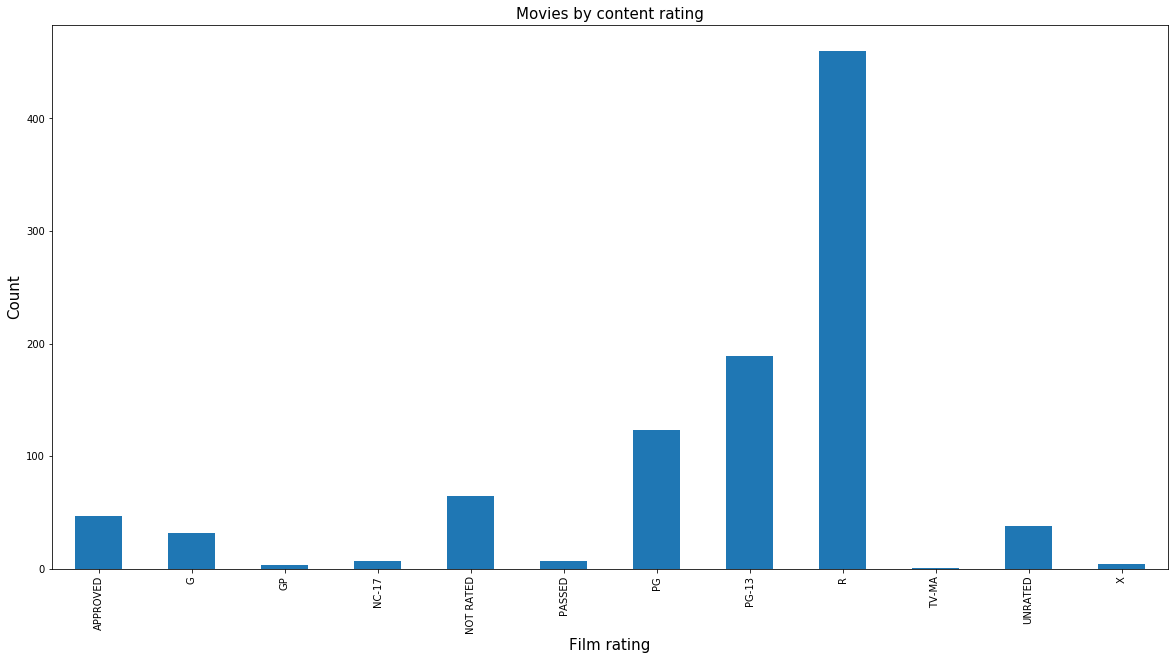

In [22]:
# Answer:
fontsize = 15
ratings.plot(kind='bar', figsize=(20,10), legend=None)
plt.xlabel('Film rating', fontsize=fontsize)
plt.ylabel('Count', fontsize=fontsize)
plt.title('Movies by content rating', fontsize=fontsize);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [23]:
# Answer:
rename_rows = {
    "NOT RATED" : "UNRATED",
    "APPROVED" : "UNRATED",
    "PASSED" : "UNRATED",
    "GP" : "UNRATED"
    }

In [24]:
movies = movies.replace(rename_rows)

In [25]:
movies.groupby(movies['content_rating'])[['title']].count()

,title
content_rating,
G,32
NC-17,7
PG,123
PG-13,189
R,460
TV-MA,1
UNRATED,160
X,4


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [26]:
# Answer:
convert_ratings = {
    "X" : "NC-17",
    "TV-MA" : "NC-17"
}

In [27]:
movies = movies.replace(convert_ratings)

In [28]:
movies.groupby(movies['content_rating'])[['title']].count()

,title
content_rating,
G,32
NC-17,12
PG,123
PG-13,189
R,460
UNRATED,160


#### Count the number of missing values in each column.

In [29]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [30]:
# shows unrated films
movies[movies.isna().any(axis=1)]

,star_rating,title,content_rating,genre,duration,actors_list
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."


In [31]:
#fills these with R
movies = movies.fillna('R')

In [32]:
#showing one of these to check it's been filled
movies[movies['title'] == 'True Grit']

,star_rating,title,content_rating,genre,duration,actors_list
936,7.4,True Grit,R,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [33]:
# Answer:
more_than_two_hours = movies['star_rating'][(movies['duration'] > 120)].mean()
less_than_two_hours = movies['star_rating'][(movies['duration'] < 120)].mean()

In [34]:
less_than_two_hours

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [35]:
# Answer:
cols = ['duration', 'star_rating']

In [36]:
duration_star_rating = movies[cols]

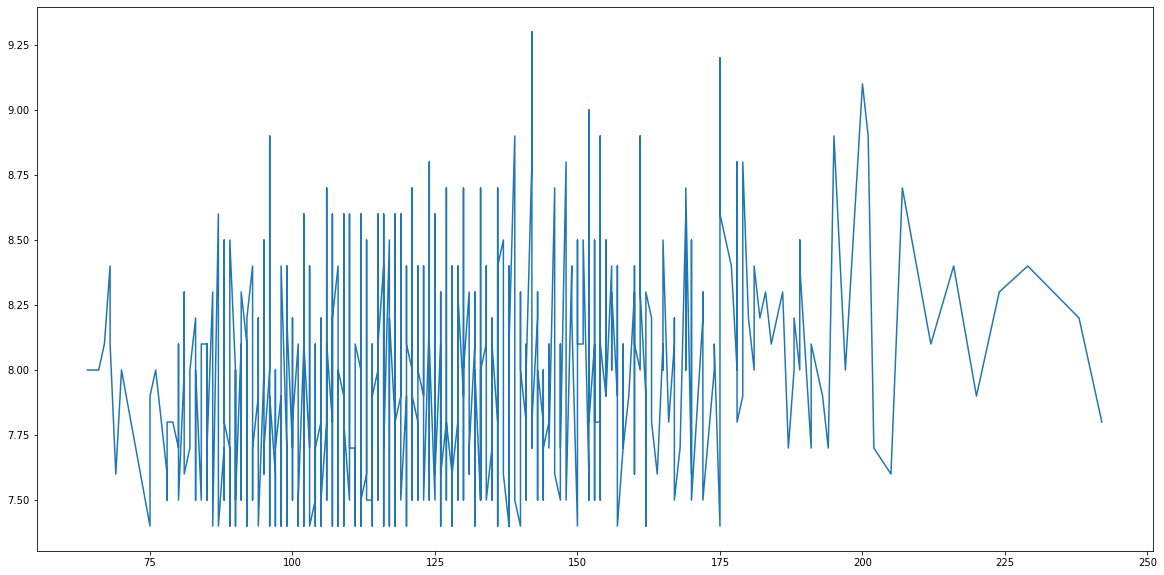

In [40]:
plt.figure(figsize=(20,10))
x = duration_star_rating['duration']
y = duration_star_rating['star_rating']
plt.plot(x,y);

#### Calculate the average duration for each genre.

In [38]:
# Answer:
movies.groupby('genre')[['duration']].mean().sort_values(by='duration')
# movies.groupby('genre')[['duration']].mean()

,duration
genre,
History,66.000000
Animation,96.596774
Film-Noir,97.333333
Horror,102.517241
Family,107.500000
Comedy,107.602564
Sci-Fi,109.000000
Fantasy,112.000000
Thriller,114.200000


## Advanced level

#### Visualize the relationship between content rating and duration.

In [39]:
content_versus_duration = movies.groupby('content_rating')[['duration']].mean()

In [40]:
content_versus_duration

,duration
content_rating,
G,112.343750
NC-17,116.250000
PG,115.300813
PG-13,127.195767
R,122.226782
UNRATED,116.475000


Text(0.5, 1.0, 'Content rating versus average duration')

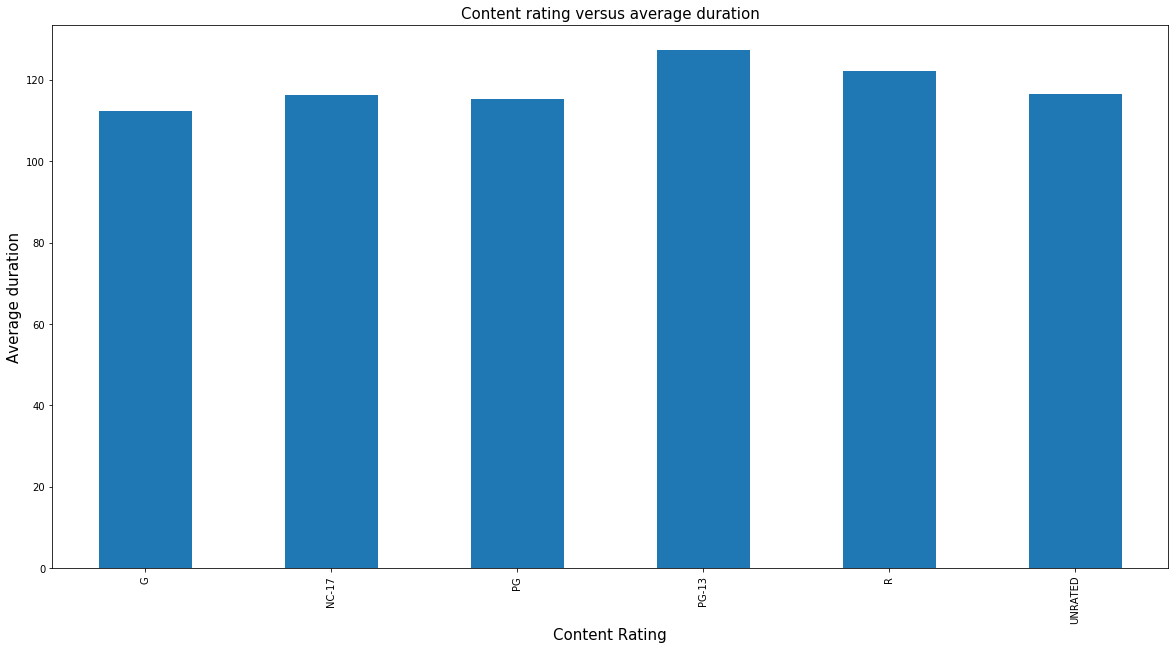

In [41]:
# Answer:
fontsize = 15
content_versus_duration.plot(kind='bar', figsize=(20,10), legend=None)
plt.xlabel('Content Rating', fontsize=fontsize)
plt.ylabel('Average duration', fontsize=fontsize)
plt.title('Content rating versus average duration', fontsize=fontsize)

#### Determine the top rated movie (by star rating) for each genre.

In [43]:
test = movies.set_index(['genre', 'star_rating']).sort_index(level=0)

In [47]:
test.max(level=0)

,title,content_rating,duration,actors_list
genre,,,,
Action,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [444]:
#how has this worked?
movies.groupby(['genre']).max()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,Yojimbo,UNRATED,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,UNRATED,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,UNRATED,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,UNRATED,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,UNRATED,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,UNRATED,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,UNRATED,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Family,7.9,Willy Wonka & the Chocolate Factory,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [7]:
movies.loc[movies.duplicated(subset='title', keep=False)].sort_values(by='title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!